In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/aapl.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
half_df = df.reset_index().sample(frac=.5).sort_values('index')

In [12]:
half_df

,index,Date,Open,High,Low,Close,Adj Close,Volume
1,1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
4,4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
5,5,2014-11-03,108.220001,110.300003,107.720001,109.010002,102.328766,199952900
6,6,2014-11-10,109.019997,114.190002,108.400002,114.180000,107.646675,205166700
...,...,...,...,...,...,...,...,...
176,176,2018-02-12,158.500000,174.820007,157.509995,172.429993,172.429993,225336900
177,177,2018-02-19,172.050003,175.649994,171.009995,175.500000,175.500000,136206400
178,178,2018-02-26,176.350006,180.619995,172.449997,176.210007,176.210007,202128400
181,181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


In [13]:
df['rolling_mean'] = df['Close'].rolling(5).mean()

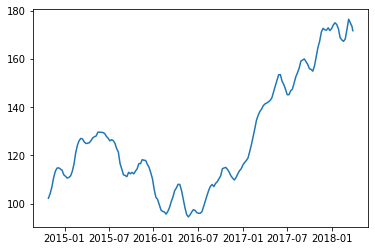

In [16]:
plt.plot(df['Date'], df['rolling_mean'], label='Smooth')

In [17]:
import quandl
quandl.ApiConfig.api_key = 'yz2smCsxKsYnJV6sh88w'
aapl_table = quandl.get('WIKI/AAPL')
aapl_table.to_pickle('apple_quandl.pkl')

In [18]:
aapl_table

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [46]:
INTEREST_RATE = .1
def get_monthly_payment(final_cost, num_months):
    final_value = lambda num_periods: pow(1 + INTEREST_RATE/12, num_periods)
    
    return final_cost / sum(final_value(num_months-i) for i in range(num_months))

In [48]:
get_monthly_payment(8000, 60)

102.45589192411207

final_cost = sum of each payment times their interest thing.

f = p * interest_0 + p * interest_1 ...

also known as 

f = p * (interest_0 + interest_1 ...)

in code thats p = f / sum(interest rates)